In [29]:
import matplotlib.pyplot as plt
import mglearn
import numpy
import pandas as pd
dados = pd.read_csv('chocolate.csv')

In [30]:
dados.head(6)

,Company_(Maker_if_known),Specific_Bean_Origin or_Bar_Name,REF,Review_Date,Cocoa,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela


In [31]:
dados.describe()

,REF,Review_Date,Cocoa,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [32]:
dados2=dados[['Rating','Cocoa']] #cocoa é o quanto por cento de cacau tem o chocolate
dados2.head(5)

,Rating,Cocoa
0,3.75,63.0
1,2.75,70.0
2,3.00,70.0
3,3.50,70.0
4,3.50,70.0


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(dados2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
print(kmeans.predict(dados2))

[0 1 1 ..., 0 0 0]


In [35]:
%matplotlib inline

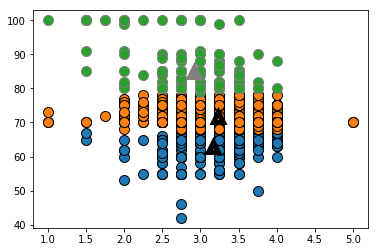

In [36]:
mglearn.discrete_scatter(dados2.Rating,dados2.Cocoa , kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=5)

In [37]:
from sklearn.model_selection import GridSearchCV


kmeans = KMeans()

params = {'n_clusters': [1, 10] }


grid = GridSearchCV(cv=5, estimator= kmeans, param_grid= params)


grid.fit(dados2)

# podemos ver pelo grid search que o número ideial de clusters é 8 


GridSearchCV(cv=5, error_score='raise',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_clusters': [1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

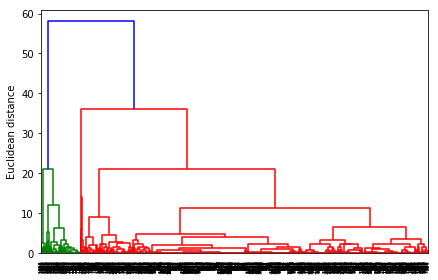

In [38]:
#Dendograma

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(dados2, metric='euclidean')),
                        )
row_dist
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(dados2, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters)
                       
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [39]:
#vendo os paises que tem mais empresas

import collections
counter=collections.Counter(dados.Company_Location)
print(print(counter.most_common(12)))

[('U.S.A.', 764), ('France', 156), ('Canada', 125), ('U.K.', 96), ('Italy', 63), ('Ecuador', 54), ('Australia', 49), ('Belgium', 40), ('Switzerland', 38), ('Germany', 35), ('Austria', 26), ('Spain', 25)]
None


In [40]:
#vendo os paises que mais exportam semente

import collections
counter=collections.Counter(dados.Broad_Bean_Origin)
print(print(counter.most_common(12)))

[('Venezuela', 214), ('Ecuador', 193), ('Peru', 165), ('Madagascar', 145), ('Dominican Republic', 141), ('\xa0', 73), ('Nicaragua', 60), ('Brazil', 58), ('Bolivia', 57), ('Belize', 49), ('Papua New Guinea', 42), ('Colombia', 40)]
None


In [ ]:
#Para ver alguma relação nos países (e não mais no chocolate) fizemos no excel duas tabelas
#para explorar a frequência do país na base e o percentual médio de chocolate

In [41]:
pais_empresa = pd.read_csv('paisempresa.csv')
pais_empresa.head(5)

,count,average_cocoa
0,1,74.000000
1,2,70.000000
2,48,73.520833
3,56,71.696429
4,58,71.137931


In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pais_empresa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

TypeError: 'method' object is not subscriptable

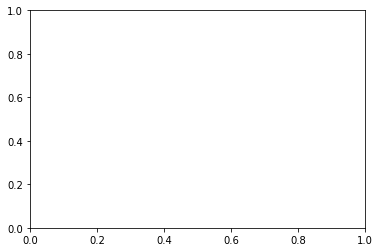

In [44]:
mglearn.discrete_scatter(pais_empresa.count,pais_empresa.average_cocoa , kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1],
    markers='^') ##por alguma razão não conseguimos fazer o gráfico...

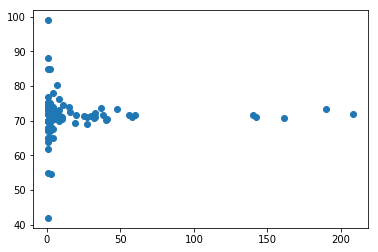

In [46]:
plt.scatter(pais_empresa['count'], pais_empresa['average_cocoa']) # mas fizemos o gráfico de dispersão para dar uma olhada 